In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from app.get_data import SQL
from app.configs import TABLE_SHARE_HOLDERS

In [2]:

db_obj = SQL()
df = db_obj.get_data(table_name=TABLE_SHARE_HOLDERS, limit=1)
print(df.columns)

Index(['Id', 'relatedDate', 'shareHolderCode', 'cisinShare', 'shareQuantity',
       'sharePerc', 'shareHolderName', 'shareQuantityYest', 'sharePercYest',
       'modifiedDate', 'createdDate', 'sourceId', 'symbolId', 'tradeType',
       'tabRecIndex', 'tsetmcClass', 'symbolHistoryId', 'rDate', 'isHoliday'],
      dtype='object')


In [3]:
df_shareholders_change = db_obj.get_diff_shares_primary()
df_shareholders_change = db_obj.get_diff_shares_primary_with_feature()

,Id,relatedDate,shareHolderCode,cisinShare,shareQuantity,sharePerc,shareHolderName,shareQuantityYest,sharePercYest,modifiedDate,createdDate,sourceId,symbolId,tradeType,tabRecIndex,tsetmcClass,symbolHistoryId,rDate,isHoliday
0,1,2021-09-25 00:00:00.0000000,460,IRO1KNRZ0001,2459836969,83.760002,شرکت سرمایه گذاری توسعه معادن وفلزات-سهامی عام,2459836969,83.760002,0001-01-01 00:00:00.0000000,0001-01-01 00:00:00.0000000,2,275,1,0,6,904,2021-09-25,None


In [40]:
df_shareholders_change.to_csv("shareholders_changes.csv")

In [8]:
display(df_shareholders_change)
print(len(df_shareholders_change))
print(len(df_shareholders_change.symbolId.unique()))
print(len(df_shareholders_change.shareHolderCode.unique()))

,relatedDate,shareHolderCode,shareHolderName,sharePercYest,sharePerc,symbolId,sharePercDiff,name
0,2019-08-26 00:00:00.0000000,22175,شرکت صنایع پتروشیمی خلیج فارس-سهامی عام-,4.690000,95.239998,693,90.549995,دهدشت
1,2019-04-17 00:00:00.0000000,22649,شخص حقیقی,4.090000,79.110001,641,75.020004,قشرین
2,2018-04-10 00:00:00.0000000,652,شرکت گسترش سرمایه گذاری تک تار-سهای خاص-,14.690000,85.419998,261,70.729996,کروی
3,2019-01-20 00:00:00.0000000,50275,شرکت کرمان موتور-سهامی خاص-,5.030000,75.050003,505,70.020004,خکرمان
4,2023-07-26 00:00:00.0000000,20062,شرکت سرمایه گذاری اهداف-سهامی عام-,10.040000,78.150002,487,68.110001,ومهان
...,...,...,...,...,...,...,...,...
225413,2019-04-09 00:00:00.0000000,490,شرکت سرمایه گذاری صباتامین-سهامی عام-,71.570000,7.650000,312,-63.919998,وتجارت
225414,2021-04-05 00:00:00.0000000,60440,شرکت پدیده شیمی پایدار-سهامی خاص-,76.120003,12.070000,238,-64.050003,قرن
225415,2019-04-27 00:00:00.0000000,447,شرکت سرمایه گذاری تامین اجتماعی-سهامی عام-,97.800003,32.320000,591,-65.480003,لخانه
225416,2022-03-15 00:00:00.0000000,527,شرکت سرمایه گذاری ملی ایران-سهامی عام-,70.589996,2.970000,60,-67.619995,چفیبر


225418
739
5557


symbolId
191     1482
362     1299
265     1229
302     1228
484     1219
        ... 
616        2
645        2
668        1
2680       1
2682       1
Name: count, Length: 739, dtype: int64

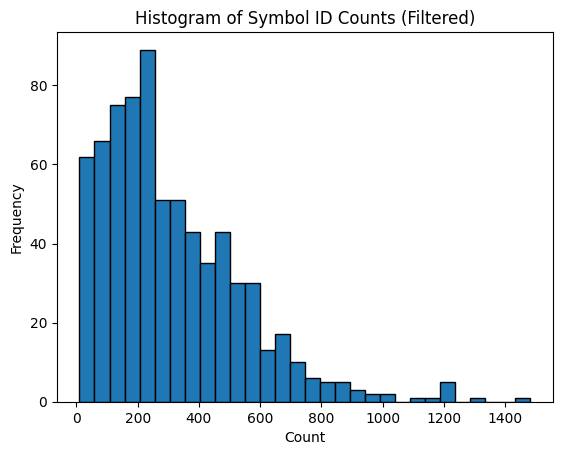

In [19]:
symbol_counts = df_shareholders_change['symbolId'].value_counts()
display(symbol_counts)

filtered_counts = symbol_counts[symbol_counts >= 10]

plt.hist(filtered_counts.values, bins=30, edgecolor='black')
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram of Symbol ID Counts (Filtered)")
plt.show()

shareHolderCode
50909    7050
42238    5774
46036    4709
51402    3812
50192    3219
         ... 
71104       1
44988       1
44990       1
77618       1
79086       1
Name: count, Length: 5557, dtype: int64

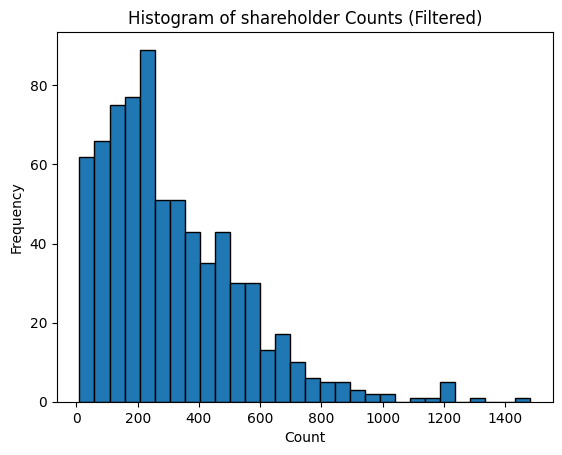

In [21]:
shareholder_counts = df_shareholders_change['shareHolderCode'].value_counts()
display(shareholder_counts)

shareholder_counts = symbol_counts[symbol_counts >= 5]

plt.hist(filtered_counts.values, bins=30, edgecolor='black')
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram of shareholder Counts (Filtered)")
plt.show()

In [20]:
df_191 = df_shareholders_change.query("symbolId == 191")
display(df_191)

,relatedDate,shareHolderCode,shareHolderName,sharePercYest,sharePerc,symbolId,sharePercDiff,name
883,2018-05-13 00:00:00.0000000,42351,شرکت امیدسازه غزال-سهامی خاص-,1.74,3.87,191,2.13,غاذر
1379,2019-10-08 00:00:00.0000000,51065,شرکت سرمایه گذاری ساختمانی اعتمادگستر-س.ع-,1.06,2.41,191,1.35,غاذر
1700,2023-07-26 00:00:00.0000000,45187,شرکت مدیریت سرمایه گذاری همیاری کوثر-سهامی عام,1.94,3.03,191,1.09,غاذر
2369,2018-12-31 00:00:00.0000000,50882,شخص حقیقی,1.00,1.94,191,0.94,غاذر
2942,2022-05-22 00:00:00.0000000,45190,کارگزاری توسعه کشاورزی-سهامی خاص-,2.45,3.21,191,0.76,غاذر
...,...,...,...,...,...,...,...,...
223957,2022-10-17 00:00:00.0000000,21448,شخص حقیقی,5.01,2.95,191,-2.06,غاذر
224008,2018-05-13 00:00:00.0000000,46230,شرکت سرمایه گذاری توسعه آذربایجان-سهامی عام-,7.18,5.03,191,-2.15,غاذر
224016,2022-10-15 00:00:00.0000000,21666,شرکت عمران عرش پرسا-سهامی خاص-,10.24,8.08,191,-2.16,غاذر
224398,2023-02-01 00:00:00.0000000,2004,شخص حقیقی,4.16,1.20,191,-2.96,غاذر


In [25]:
df_shareholders_change.info()
type(df_shareholders_change.relatedDate.values[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225418 entries, 0 to 225417
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   relatedDate      225418 non-null  object 
 1   shareHolderCode  225418 non-null  object 
 2   shareHolderName  225418 non-null  object 
 3   sharePercYest    225418 non-null  float64
 4   sharePerc        225418 non-null  float64
 5   symbolId         225418 non-null  int64  
 6   sharePercDiff    225418 non-null  float64
 7   name             225418 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 13.8+ MB


str

In [39]:
df_f = calculate_shareholder_features(df_191)
display(df_f)

,relatedDate,shareHolderCode,shareHolderName,sharePercYest,sharePerc,symbolId,sharePercDiff,name,num_individual_shareholders,percent_share_individual,num_corporate_shareholders,percent_share_corporate,total_shares
883,2018-05-13 00:00:00.0000000,42351,شرکت امیدسازه غزال-سهامی خاص-,1.74,3.87,191,2.13,غاذر,0.0,0.00,2.0,8.90,8.90
1379,2019-10-08 00:00:00.0000000,51065,شرکت سرمایه گذاری ساختمانی اعتمادگستر-س.ع-,1.06,2.41,191,1.35,غاذر,1.0,1.61,1.0,2.41,4.02
1700,2023-07-26 00:00:00.0000000,45187,شرکت مدیریت سرمایه گذاری همیاری کوثر-سهامی عام,1.94,3.03,191,1.09,غاذر,0.0,0.00,1.0,3.03,3.03
2369,2018-12-31 00:00:00.0000000,50882,شخص حقیقی,1.00,1.94,191,0.94,غاذر,3.0,9.42,1.0,11.24,20.66
2942,2022-05-22 00:00:00.0000000,45190,کارگزاری توسعه کشاورزی-سهامی خاص-,2.45,3.21,191,0.76,غاذر,4.0,15.05,3.0,8.79,23.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223957,2022-10-17 00:00:00.0000000,21448,شخص حقیقی,5.01,2.95,191,-2.06,غاذر,1.0,2.95,0.0,0.00,2.95
224008,2018-05-13 00:00:00.0000000,46230,شرکت سرمایه گذاری توسعه آذربایجان-سهامی عام-,7.18,5.03,191,-2.15,غاذر,0.0,0.00,2.0,8.90,8.90
224016,2022-10-15 00:00:00.0000000,21666,شرکت عمران عرش پرسا-سهامی خاص-,10.24,8.08,191,-2.16,غاذر,1.0,5.54,1.0,8.08,13.62
224398,2023-02-01 00:00:00.0000000,2004,شخص حقیقی,4.16,1.20,191,-2.96,غاذر,3.0,3.91,2.0,5.24,9.15
